# Машинное обучение, DS-поток
## Задание 1.7


**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds20_bot`.
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* **Подробные правила выполнения задания написаны далее.**

**Баллы за задание:**

* Часть 1 – 20 баллов
* Часть 2 – 5 баллов

## Часть 1: Сверточные сети

В этой домашней работе вам предстоит построить сверточную сеть для классификации картинок из датасета [**"Best Artworks Of All Time"**](https://www.kaggle.com/ikarus777/best-artworks-of-all-time). По изображению картины нужно предсказать художника, написавшего ее.

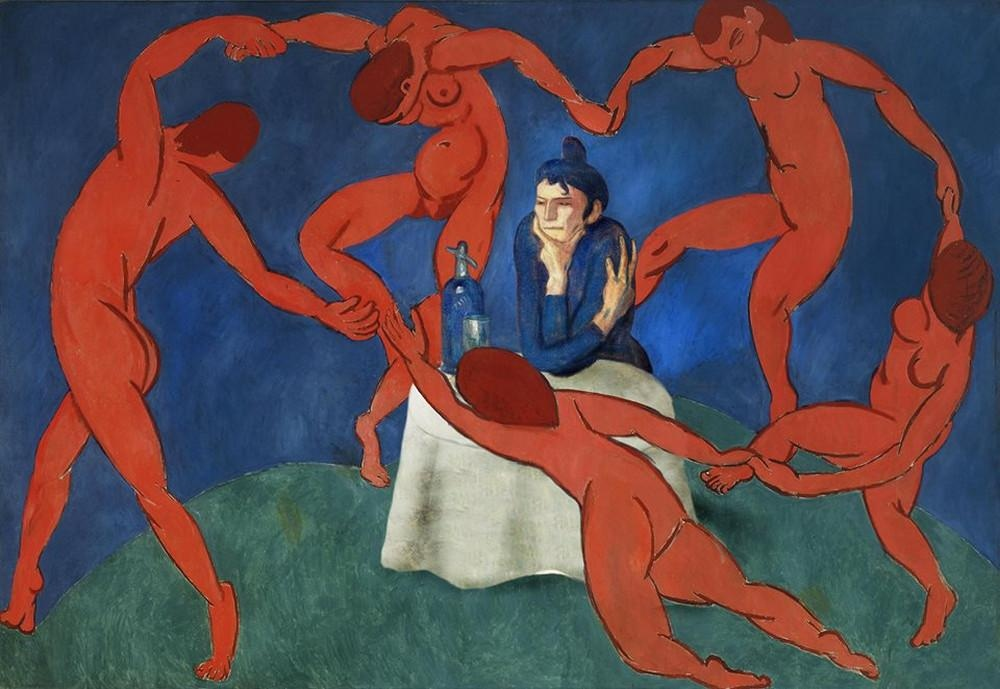

**Пожалуйста, ПРОЧИТАЙТЕ ВНИМАТЕЛЬНО то, что написано ниже, там изложены требования к вашей работе и полезные советы!**

Цель задания – построить нейросеть, чтобы достичь максимально возможного значения f1-меры для многоклассовой классификации. В конце задания вы должны будете предоставить отчет о проделанной работе.

**Оценивание вашей работы**

В сумме за домашнюю работу можно получить $25$ баллов.

* Начинаем с 0 баллов.  
* +$3$ балла за работу за предоставление детального отчета. Требования к нему изложены ниже.
* +$3$ балла за построение нейросети, которая достигает значения F1-score не менее 15% на тестовом датасете.
* +$2$ балла за каждый следующий пройденный порог.
    * 20%   F1-score
    * 25%   F1-score   
    * 27.5% F1-score
    * 30%   F1-score
    * 32.5% F1-score
    * 35%   F1-score
    
* +$2$ балла за использование критерия остановки обучения сеток.

* +$5$ баллов за выполнение второй части задания &mdash; Transfer Learning.

**Требование к работе**

* F1-метрика считается так: вычислется F1-метрика для каждого лейбла, а далее усреденяется по всем лейблам. Таким образом, мы хотим хорошо предсказывать авторство картин для любого из авторов, несмотря на размер заданной выборки. Получить метрику можно, используя `f1_score(y_true, y_pred, average="macro")` из `sklearn.metrics`.

* В *первой* части задания **запрещено** использовать предобученные нейросети. Для этого есть *вторая* часть домашней работы и она оценивается отдельно!

* **Запрещено** использовать тестовые данные где-либо за исключением вычисления финальной оценки качества. Подсказка &mdash; распределение данных на тесте такое же как в тестовых данных.

* Сохраните веса лучшей модели с помощью `torch.save` ([инструкция](https://pytorch.org/tutorials/beginner/saving_loading_models.html)) и пришлите ссылку на файл с весами на google диске. Так мы сможем проверить выполнение предыдущего пункта. **Работы без присланных весов не будут засчитаны.**

    Пример сохранения и загрузки весов модели.
    
    ```
    # Сохраненеи весов модели
    torch.save(model.state_dict, PATH)
    
    # Загрузка весов модели
    model.load_state_dict(PATH)
    ```
    
    С помощью `torch.save` можно сохранять вообще всю полезную информацию о модели или ее обучении в виде словаря, например, веса  модели, состояние оптимизатора, историю, количества эпох. 
    ```
    # Сохранение количества эпох, весов модели, состояние оптимизатора, истории обучения:
    torch.save({
        'epoch': 255,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'history': dict(history),
        }, PATH)

    # Загрузка весов модели, состояния оптимизатора и истории:
    train_info = torch.load(PATH)
    model.load_state_dict(train_info['model_state_dict'])
    optimizer.load_state_dict(train_info['optimizer_state_dict'])
    history = train_info['history']

    ```

**Требования к отчёту**

* Опишите свои эксперименты: с чего вы начали, что попробовали улучшить и почему, заработало это или нет, какие вы сделали из этого выводы.

* Опишите вашу лучшую архитектуру, методы обучения и интересные моменты.


### Советы
#### Общие советы
* Задача классификации картин по авторам отличается от стандартной классификации изображений по объектам. Картины отличаются не только тем, что именно изображено на них, но также стилем, свойственным данному автору. Об этом не стоит забывать, в особенности при аугментации данных.
* Если возникают трудности с первой частью задания, то попробуйте сначала часть с transfer-learning. Должна появиться какая-то интуиция по обучению, и, возмжно, реализации моеделей.

#### Архитектура нейросети
* Это задание может быть решено последовательностью сверток, пулингов, батчнорма и активаций. Но не стоит останавливаться на этом.
* Можно рассмотреть такие архитектуры как [Inception family](https://hacktilldawn.com/2016/09/25/inception-modules-explained-and-implemented/), [ResNet family](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035?gi=9018057983ca), [Densely-connected convolutions](https://arxiv.org/abs/1608.06993). Однако вам нужно будет реализовать их самостоятельно.
* Попробуйте сначала построить простую нейросеть, чтобы понять как с ними работать, перед тем как использовать resnet-152.
* Также можно попробовать разные активации: `tanh`, `leaky relu` и другие.
* Для тех, кто хочет разобраться в задаче основательно, предлагается для изучения статья [Image Style Classification based on Learnt Deep
Correlation Features](https://www.researchgate.net/publication/322903018_Image_Style_Classification_Based_on_Learnt_Deep_Correlation_Features). Ее можно открыть с помощью [sci-hub](https://www.sci-hub.ru/). Из предложенной статьи можно выделить идеи, которые могут помочь с решением задачи. Если вы будете пользоваться какими-то идеями из статьи, то не забудьте указать об этом в отчете.

#### Переобучение
Если ваша нейросеть переобучается: лосс на тесте падает, а на валидации растет, вот некоторые методы, как с этим бороться:
* Попробуйте добавить Dropout. Не бойтесь удалять много данных, но всегда проверяйте, что это не испортило вам качество.
* Добавьте L2 регуляризацию весов, начните с небольшого значения. Регуляризация контролируется параметром `weight_decay` оптимизатора.
* Попробуйте уменьшать `learning rate` с течением времени. В этом поможет `torch.optim.lr_scheduler`.
* Уменьшите число нейронов в сети.
* [Прерывайте обучение](https://github.com/Bjarten/early-stopping-pytorch), если сеть начала переобучаться.

#### Процесс обучения
* Воспользуйтесь GPU google colab или любой другой GPU, которая у вас есть. 
* Для сокращения вычислительной сложности можно поэксперементировать с параметром `stride`. Кроме того можете попробовать разные виды Poooling-ов.
* Эксперементируйте с оптимизаторами: `rmsprop`, `nesterov_momentum`, `adam`, `adagrad` и далее. В этом вам поможет  `torch.optim`.
* Помните, что некоторым нейросетям требуется $10$ эпох, чтобы сойтись, а некоторым – $500$. Большие нейросети дольше обучаются. При этом маленькие сети больше склонны к переобучению.
* Если вы достигли какого-то порога на валидации лучше подождать примерно 10 эпох перед тем как останавливать обучение.

#### Аугментация данных
* Вы можете использовать [torchvision.transforms](https://pytorch.org/docs/stable/torchvision/transforms.html), с которой мы рабоатли на семинарах, но при желании можете использовать любые библиотеки, например: [albumentations](https://albumentations.readthedocs.io/en/latest/api/augmentations.html), [augmentor](https://augmentor.readthedocs.io/en/master/), [imgaug](https://imgaug.readthedocs.io/en/latest/).
* Пропробуйте повернуть картинку + приблизить, чтобы убрать черные края.
* Отразить её вертикально или горизонтально.
* Сократить размер картинки, это позволит сократить параметры сети.
* Можете вырезать случайные кусочки определенного размера.
* Помните, что вы применяте аугментации для классификации картин по автору. Решите, какие преобразования могут помочь вам, а какие увеличат скорость обучения или даже ухудшат результат.


#### И главное: 

* Тестируйте только **одну идею за раз**.
* Сохраняёте веса моделей для каждого эксперимента или через N эпох или при достижении наилучшего качества на валидации, чтобы нечаянно не потерять результаты долгой работы.
* Рисуйте кривые обучения: loss и F1-score для обучения и валидации.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

from sklearn.utils.random import sample_without_replacement

%matplotlib inline

*Архив* с данными лежит по [ссылке](https://drive.google.com/file/d/1t-EQE6xtR8rrDCFqWGdl6Y3EqwcbF3fK/view?usp=sharing). 

### Для Google Colab
Чтобы не грузить данные каждый раз в колаб при его отключении, а данные сюда грузятся небыстро, будет лучше всего поступить следующим образом. 
* Загрузите архив на диск.
* Подключитесь к Google диску с помощью меню колаба слева или и с помощью кода ниже.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

Теперь вы можете обратиться к данным, используя путь 

In [21]:
import subprocess

def upload_file_from_gdrive(gdrive_file_id, outfile) -> None:
    """ Скачивает файл из Google Drive по ID """
    
    upload_cmd = (
        "wget --load-cookies /tmp/cookies.txt"
        " \"https://docs.google.com/uc?export=download&confirm=$("
        " wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies"
        f" --no-check-certificate 'https://docs.google.com/uc?export=download&id={gdrive_file_id}'"
        f" -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\\1\\n/p')&id={gdrive_file_id}\" "
        f" -O {outfile} && rm -rf /tmp/cookies.txt"
    )
    subprocess.check_call(upload_cmd, shell=True)

In [22]:
upload_file_from_gdrive("1t-EQE6xtR8rrDCFqWGdl6Y3EqwcbF3fK", "data.zip")

In [45]:
# Путь до диска
DISK_PATH = "drive/MyDrive"
# Путь до архива с данными
ZIP_PATH = "data.zip"
# Путь для папки с данными
DATA_PATH = "."

* Разархивируйете данные на диске.

In [4]:
!unzip $ZIP_PATH -d  $DATA_PATH

"unzip" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [46]:
DATA_PATH = os.path.join(DATA_PATH, 'data')

В папке `DATA_PATH` теперь хранится папка с тренировочными данными `train` и тестовыми `test`. В папку с тестовыми данными не подглядывать :)

In [6]:
! ls $DATA_PATH

"ls" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


В `train` датасете $50$ художников (классов) и $6116$ изображения картин (объектов). Посмотрим на какую-нибудь картину из набора данных.

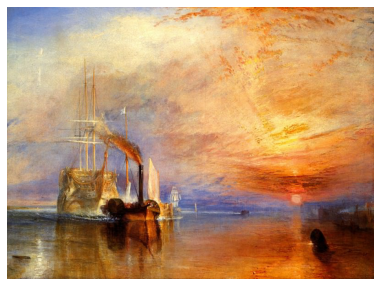

In [47]:
path_to_img = os.path.join(DATA_PATH, "train/William_Turner/William_Turner_9.jpg")
image = plt.imread(path_to_img)
plt.figure(figsize=(12, 5))
plt.imshow(image)
plt.axis("off");

Разобьем `train` выборку на `train` и `val`:



In [48]:
from torchvision.transforms.transforms import RandomRotation
import os
import time
import glob
import requests
from tqdm.notebook import tqdm
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import torch
from torch import nn
import torch.nn.functional as F

import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ColorJitter, Resize, RandomVerticalFlip, RandomHorizontalFlip 
from torchvision.transforms import RandomAffine, RandomRotation, RandomResizedCrop
from sklearn.metrics import f1_score

from IPython.display import clear_output
%matplotlib inline

sns.set(font_scale=1.2, style='whitegrid')

# device_num = 0
# torch.cuda.set_device(device_num)

device = f"cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [49]:
# Папка с всеми картинами / папка с картинами для тренировки
TRAIN_DIR = os.path.join(DATA_PATH, "train")
# Считываем названия директорий, которые и есть имена авторов
ARTIST_LIST = {i:name for i, name in enumerate(os.listdir(TRAIN_DIR))}


# Папка с картинами для валидации
VAL_DIR = os.path.join(DATA_PATH, "val")
os.makedirs(VAL_DIR, exist_ok=True)

# Папка с картинами для теста
TEST_DIR = os.path.join(DATA_PATH, "test")


# Доля картин в валидации
VAL_FRAC = 0.3

min_img_h = np.inf
min_img_w = np.inf

# Создаем директорию с валидационной выборкой для каждого художника.
for artist in tqdm(ARTIST_LIST.values()):
    os.makedirs(os.path.join(VAL_DIR, artist), exist_ok=True)

    # Считываем выборку картин художника.
    artist_path = os.path.join(TRAIN_DIR, artist)
    
    # Сортируем картины для детерминированнсти
    images_filename = sorted(os.listdir(artist_path))
    
    # Выделяем часть картин для валидации
    # Выбираем случайные картины из выборки для валидции, с установленным random_state
    num_images = len(images_filename)
    num_val = int(num_images * VAL_FRAC)
    indices = sample_without_replacement(num_images, num_val, random_state=42)
    val_images = np.take(images_filename, indices)

    for image_filename in images_filename:
        img_path = os.path.join(artist_path, image_filename)
        img = plt.imread(img_path)
        if img.shape[0] < min_img_h:
            min_img_h = img.shape[0]

        if img.shape[1] < min_img_w:
            min_img_w = img.shape[1]

    print(f'{artist} | train images = {num_images - num_val} | val images = {num_val}')
    
    # Сохраняем валидационную выборку
    for image_filename in val_images:
        source = os.path.join(TRAIN_DIR, artist, image_filename)
        destination = os.path.join(VAL_DIR, artist, image_filename)
        shutil.copy(source, destination)
        os.remove(source)

print(min_img_h)
print(min_img_w)

  0%|          | 0/50 [00:00<?, ?it/s]

Albrecht_Du╠Иrer | train images = 113 | val images = 48
Alfred_Sisley | train images = 89 | val images = 38
Amedeo_Modigliani | train images = 67 | val images = 28
Andrei_Rublev | train images = 35 | val images = 14
Andy_Warhol | train images = 63 | val images = 26
Camille_Pissarro | train images = 32 | val images = 13
Caravaggio | train images = 19 | val images = 8
Claude_Monet | train images = 26 | val images = 10
Diego_Rivera | train images = 25 | val images = 10
Diego_Velazquez | train images = 45 | val images = 18
Edgar_Degas | train images = 241 | val images = 103
Edouard_Manet | train images = 31 | val images = 13
Edvard_Munch | train images = 24 | val images = 9
El_Greco | train images = 30 | val images = 12
Eugene_Delacroix | train images = 11 | val images = 4
Francisco_Goya | train images = 101 | val images = 42
Frida_Kahlo | train images = 42 | val images = 17
Georges_Seurat | train images = 15 | val images = 6
Giotto_di_Bondone | train images = 42 | val images = 17
Gustave_

Данный датасет очень не сбалансирован по классам, возможные пути решения:
* *random oversampling* – включаем несколько копий объектов меньших классов, увеличивая их до размера большего класса, к копиям можно применять аугментацию;
* *random undersampling* – не включаем часть объектов больших классов в обучающую выборку;
* *примение весов* к лосс-функции;
* ...

Предлагаем вам самим подумать как стоит бороться с дисбалансом классов и написать код. 

Сделаем следующим образом: картин разное количество из-за того, что:
* картин некоторых художников слишком много;
* картин других художников слишком мало.
Выберем порог (пусть это будет 120) количества картин каждого из художников. Если картин больше этого количества, то оставим только 120, тем самым, сделав *random undersampling*. Если же картин меньше этого количества, то добавим картины с использованием аугментауции, тем самым, сделав *random oversampling*.

Убедимся еще раз, что в папке train и val все разложено по папкам-классам (авторам). Эта структура папок важна для использования классов PyTorch по работе с данными (`ImageFolder` и `DataLoader`):

In [60]:
!ls $TRAIN_DIR

Albrecht_Du╠Иrer   Georges_Seurat	      Paul_Cezanne
Alfred_Sisley	   Giotto_di_Bondone	      Paul_Gauguin
Amedeo_Modigliani  Gustave_Courbet	      Paul_Klee
Andrei_Rublev	   Gustav_Klimt		      Peter_Paul_Rubens
Andy_Warhol	   Henri_de_Toulouse-Lautrec  Pierre-Auguste_Renoir
Camille_Pissarro   Henri_Matisse	      Pieter_Bruegel
Caravaggio	   Henri_Rousseau	      Piet_Mondrian
Claude_Monet	   Hieronymus_Bosch	      Raphael
Diego_Rivera	   Jackson_Pollock	      Rembrandt
Diego_Velazquez    Jan_van_Eyck		      Rene_Magritte
Edgar_Degas	   Joan_Miro		      Salvador_Dali
Edouard_Manet	   Kazimir_Malevich	      Sandro_Botticelli
Edvard_Munch	   Leonardo_da_Vinci	      Titian
El_Greco	   Marc_Chagall		      Vasiliy_Kandinskiy
Eugene_Delacroix   Michelangelo		      Vincent_van_Gogh
Francisco_Goya	   Mikhail_Vrubel	      William_Turner
Frida_Kahlo	   Pablo_Picasso


In [61]:
!ls $VAL_DIR

Albrecht_Du╠Иrer   Georges_Seurat	      Paul_Cezanne
Alfred_Sisley	   Giotto_di_Bondone	      Paul_Gauguin
Amedeo_Modigliani  Gustave_Courbet	      Paul_Klee
Andrei_Rublev	   Gustav_Klimt		      Peter_Paul_Rubens
Andy_Warhol	   Henri_de_Toulouse-Lautrec  Pierre-Auguste_Renoir
Camille_Pissarro   Henri_Matisse	      Pieter_Bruegel
Caravaggio	   Henri_Rousseau	      Piet_Mondrian
Claude_Monet	   Hieronymus_Bosch	      Raphael
Diego_Rivera	   Jackson_Pollock	      Rembrandt
Diego_Velazquez    Jan_van_Eyck		      Rene_Magritte
Edgar_Degas	   Joan_Miro		      Salvador_Dali
Edouard_Manet	   Kazimir_Malevich	      Sandro_Botticelli
Edvard_Munch	   Leonardo_da_Vinci	      Titian
El_Greco	   Marc_Chagall		      Vasiliy_Kandinskiy
Eugene_Delacroix   Michelangelo		      Vincent_van_Gogh
Francisco_Goya	   Mikhail_Vrubel	      William_Turner
Frida_Kahlo	   Pablo_Picasso


Заметим, что Alberecht Durer встречается 2 раза в данных. Если просмотреть обе папки, то можно заметить, что первая более полная и влючает в себя вторую, которую можно удалить без зазрений совести.

In [62]:
for dir in [TRAIN_DIR, VAL_DIR, TEST_DIR]:
    path = os.path.join(dir, "Albrecht_DuтХа├кrer")
    ! rm -r $path

rm: cannot remove './data/train/Albrecht_DuтХа├кrer': No such file or directory
rm: cannot remove './data/val/Albrecht_DuтХа├кrer': No such file or directory
rm: cannot remove './data/test/Albrecht_DuтХа├кrer': No such file or directory


In [18]:
from PIL import Image

In [73]:
# ! rm -rf $TRAIN_TRANSFORMED_DIR

In [45]:
# Папка с всеми картинами / папка с картинами для тренировки
TRAIN_DIR = os.path.join(DATA_PATH, "train")
# Считываем названия директорий, которые и есть имена авторов
ARTIST_LIST = {i:name for i, name in enumerate(os.listdir(TRAIN_DIR))}

# Папка с картинами для валидации
TRAIN_TRANSFORMED_DIR = os.path.join(DATA_PATH, "train_transformed")
os.makedirs(TRAIN_TRANSFORMED_DIR, exist_ok=True)

def make_resize(img):
    resizer = torchvision.transforms.Resize(size=(min_img_h, min_img_w))
    return resizer.forward(img).numpy().transpose([1, 2, 0])

def make_vflip(img):
    vflipper = RandomVerticalFlip(p=0.5)
    return vflipper(img).numpy().transpose([1, 2, 0])

def make_hflip(img):
    hflipper = RandomHorizontalFlip(p=0.5)
    return hflipper(img).numpy().transpose([1, 2, 0])

def make_affine(img):
    affiner = RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))
    return affiner(img).numpy().transpose([1, 2, 0])

def make_rotation(img):
    rotator = RandomRotation(degrees=(0, 45))
    return rotator(img).numpy().transpose([1, 2, 0])

def make_crop(img):
    cropper = RandomResizedCrop(size=(min_img_h, min_img_w))
    return cropper(img).numpy().transpose([1, 2, 0])

def make_jit(img):
    jitter = ColorJitter(brightness=.5, hue=.3)
    return jitter(img).numpy().transpose([1, 2, 0])


dict_of_transforms = {
    0: make_vflip,
    1: make_hflip,
    2: make_affine,
    3: make_rotation,
    4: make_crop,
    5: make_jit
}

max_images = 200
# Создаем директорию с валидационной выборкой для каждого художника.
for artist in tqdm(ARTIST_LIST.values()):
    os.makedirs(os.path.join(TRAIN_TRANSFORMED_DIR, artist), exist_ok=True)

    # Считываем выборку картин художника.
    artist_path = os.path.join(TRAIN_DIR, artist)
    
    # Сортируем картины для детерминированнсти
    images_filename = sorted(os.listdir(artist_path))
    
    # Выделяем часть картин для валидации
    # Выбираем случайные картины из выборки для валидации, с установленным random_state
    num_images = len(images_filename)
    if num_images > max_images:
        indices = sample_without_replacement(num_images, max_images, random_state=42)
        num_images = max_images
        new_train_images = np.take(images_filename, indices)
        for image_filename in new_train_images:
            img_path = os.path.join(artist_path, image_filename)
            img = plt.imread(img_path)
            if len(img.shape) < 3:
                continue
            img = make_resize(torch.tensor(img.transpose([2, 0, 1])))
            pil_img = Image.fromarray(img)
            pil_img.save(os.path.join(TRAIN_TRANSFORMED_DIR, artist) + f"/{image_filename}")
    else:
        n_repeats = int(max_images / num_images)
        num_images *= n_repeats
        for image_filename in images_filename:
            img_path = os.path.join(artist_path, image_filename)
            img = plt.imread(img_path)
            if len(img.shape) < 3:
                continue
            for rep in range(n_repeats - 1):
                transform_indices = sample_without_replacement(len(dict_of_transforms), 3)
                new_img = dict_of_transforms[transform_indices[0]](torch.tensor(img.transpose([2, 0, 1])))
                new_img = dict_of_transforms[transform_indices[1]](torch.tensor(new_img.transpose([2, 0, 1])))
                new_img = dict_of_transforms[transform_indices[2]](torch.tensor(new_img.transpose([2, 0, 1])))
                new_img = make_resize(torch.tensor(new_img.transpose([2, 0, 1])))
                pil_img = Image.fromarray(new_img)
                pil_img.save(os.path.join(TRAIN_TRANSFORMED_DIR, artist) + f"/{image_filename[:-4]}_{rep}.jpg")

            img = make_resize(torch.tensor(img.transpose([2, 0, 1])))
            pil_img = Image.fromarray(img)
            pil_img.save(os.path.join(TRAIN_TRANSFORMED_DIR, artist) + f"/{image_filename}")
            
    print(f'{artist} | train images = {num_images}')

  0%|          | 0/50 [00:00<?, ?it/s]

Albrecht_Du╠Иrer | train images = 161
Alfred_Sisley | train images = 127
Amedeo_Modigliani | train images = 190
Andrei_Rublev | train images = 196
Andy_Warhol | train images = 178
Camille_Pissarro | train images = 180
Caravaggio | train images = 189
Claude_Monet | train images = 180
Diego_Rivera | train images = 175
Diego_Velazquez | train images = 189
Edgar_Degas | train images = 200
Edouard_Manet | train images = 176
Edvard_Munch | train images = 198
El_Greco | train images = 168
Eugene_Delacroix | train images = 195
Francisco_Goya | train images = 143
Frida_Kahlo | train images = 177
Georges_Seurat | train images = 189
Giotto_di_Bondone | train images = 177
Gustave_Courbet | train images = 174
Gustav_Klimt | train images = 171
Henri_de_Toulouse-Lautrec | train images = 200
Henri_Matisse | train images = 182
Henri_Rousseau | train images = 175
Hieronymus_Bosch | train images = 134
Jackson_Pollock | train images = 192
Jan_van_Eyck | train images = 200
Joan_Miro | train images = 200
Ka

In [50]:
VAL_DIR = os.path.join(DATA_PATH, "val")
# Считываем названия директорий, которые и есть имена авторов
ARTIST_LIST = {i:name for i, name in enumerate(os.listdir(VAL_DIR))}
VAL_TRANSFORMED_DIR = os.path.join(DATA_PATH, "val_transformed")

min_img_h = 226
min_img_w = 204

def make_resize(img):
    resizer = torchvision.transforms.Resize(size=(min_img_h, min_img_w))
    return resizer.forward(img).numpy().transpose([1, 2, 0])

os.makedirs(os.path.join(VAL_TRANSFORMED_DIR), exist_ok=True)
# Создаем директорию с валидационной выборкой для каждого художника.
for artist in tqdm(ARTIST_LIST.values()):
    os.makedirs(os.path.join(VAL_TRANSFORMED_DIR, artist), exist_ok=True)

    # Считываем выборку картин художника.
    artist_path = os.path.join(VAL_DIR, artist)
    
    # Сортируем картины для детерминированнсти
    images_filename = sorted(os.listdir(artist_path))
    
    num_images = len(images_filename)
    for image_filename in images_filename:
        path_to_img = os.path.join(artist_path, image_filename)
        img = plt.imread(path_to_img)
        if len(img.shape) < 3:
            continue
        img = make_resize(torch.tensor(img.transpose([2, 0, 1])))
        pil_img = Image.fromarray(img)
        pil_img.save(os.path.join(VAL_TRANSFORMED_DIR, artist) + f"/{image_filename}")


  0%|          | 0/50 [00:00<?, ?it/s]

## Часть 1: Построение сверточной сети и преодоление порогов качества 

Пока ваши нейросети будут обучаться можно начать *заполнять отчет*, который находится чуть ниже. Каждый раз после обучения каждой модели записывайте полученные результаты, на всякий случай сохраняйте графики для визуализации. Так будет легче оформить полноценный отчет о проделанной работе.

Можете смело использовать код с семинара.

In [51]:
TRAIN_TRANSFORMED_DIR = os.path.join(DATA_PATH, "train_transformed")
TRAIN_TRANSFORMED_DIR

'.\\data\\train_transformed'

In [52]:
VAL_TRANSFORMED_DIR = os.path.join(DATA_PATH, "val_transformed")
VAL_TRANSFORMED_DIR

'.\\data\\val_transformed'

In [53]:
train_dataset = datasets.ImageFolder(TRAIN_TRANSFORMED_DIR, transform=transforms.ToTensor())
val_dataset = datasets.ImageFolder(VAL_TRANSFORMED_DIR, transform=transforms.ToTensor())

In [54]:
batch_size = 32

train_batch_gen = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_batch_gen = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
# test_batch_gen = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
def plot_learning_curves(history):
    '''
    Функция для вывода лосса и метрики во время обучения.

    :param history: (dict)
        accuracy и loss на обучении и валидации
    '''
    # sns.set_style(style='whitegrid')
    fig = plt.figure(figsize=(20, 7))

    plt.subplot(1,2,1)
    plt.title('Лосс', fontsize=15)
    plt.plot(history['loss']['train'], label='train')
    plt.plot(history['loss']['val'], label='val')
    plt.ylabel('лосс', fontsize=15)
    plt.xlabel('эпоха', fontsize=15)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Точность', fontsize=15)
    plt.plot(history['f1']['train'], label='train')
    plt.plot(history['f1']['val'], label='val')
    plt.ylabel('лосс', fontsize=15)
    plt.xlabel('эпоха', fontsize=15)
    plt.legend()
    plt.show()

In [10]:
def train(
    model, 
    criterion,
    optimizer,
    scheduler,
    train_batch_gen,
    val_batch_gen,
    num_epochs
):
    '''
    Функция для обучения модели и вывода лосса и метрики во время обучения.

    :param model: обучаемая модель
    :param criterion: функция потерь
    :param optimizer: метод оптимизации
    :param train_batch_gen: генератор батчей для обучения
    :param val_batch_gen: генератор батчей для валидации
    :param num_epochs: количество эпох

    :return: обученная модель
    :return: (dict) accuracy и loss на обучении и валидации ("история" обучения)
    '''

    history = defaultdict(lambda: defaultdict(list))

    for epoch in tqdm(range(num_epochs)):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0
        
        start_time = time.time()

        # Устанавливаем поведение dropout / batch_norm  в обучение
        model.train(True) 

        y_train = np.array([])
        y_train_pred = np.array([])
        
        # На каждой "эпохе" делаем полный проход по данным
        for X_batch, y_batch in tqdm(train_batch_gen):
            # Обучаемся на батче (одна "итерация" обучения нейросети)
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            # Логиты на выходе модели
            logits = model(X_batch)
            
            # Подсчитываем лосс
            loss = criterion(logits, y_batch.long().to(device))

            # Обратный проход
            loss.backward()
            # Шаг градиента
            optimizer.step()
            # Зануляем градиенты
            optimizer.zero_grad()
            
            
            # Сохраяняем лоссы и точность на трейне
            train_loss += loss.detach().cpu().numpy()
            y_pred = logits.max(1)[1].detach().cpu().numpy()
            
            y_train = np.concatenate((y_train, y_batch.cpu().numpy()))
            y_train_pred = np.concatenate((y_train_pred, y_pred))
            
            
        # Подсчитываем лоссы и сохраняем в "историю"
        
        train_loss /= len(train_batch_gen)
        train_f1 = f1_score(y_train, y_train_pred, average='macro')
        history['loss']['train'].append(train_loss)
        history['f1']['train'].append(train_f1)
        
        scheduler.step()
    
        # Устанавливаем поведение dropout / batch_norm в режим тестирования
        model.train(False) 

        y_val = np.array([])
        y_val_pred = np.array([])
        
        # Полный проход по валидации    
        for X_batch, y_batch in val_batch_gen:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            # Логиты, полученные моделью
            logits = model(X_batch)

            # Лосс на валидации
            loss = criterion(logits, y_batch.long().to(device))

            # Сохраяняем лоссы и точность на валидации
            val_loss += loss.detach().cpu().numpy()
            y_pred = logits.max(1)[1].detach().cpu().numpy()
            
            y_val = np.concatenate((y_val, y_batch.cpu().numpy()))
            y_val_pred = np.concatenate((y_val_pred, y_pred))
            

        # Подсчитываем лоссы и сохраням в "историю"
        val_loss /= len(val_batch_gen)
        val_f1 = f1_score(y_val, y_val_pred, average='macro')
        history['loss']['val'].append(val_loss)
        history['f1']['val'].append(val_f1)
        
        clear_output()

        # Печатаем результаты после каждой эпохи
        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time.time() - start_time))
        print("  training loss (in-iteration): \t{:.6f}".format(train_loss))
        print("  validation loss (in-iteration): \t{:.6f}".format(val_loss))
        print("  training f1-score: \t\t\t{:.2f} %".format(train_f1 * 100))
        print("  validation f1-score: \t\t\t{:.2f} %".format(val_f1 * 100))
        
        plot_learning_curves(history)
        
    return model, history

In [11]:
class SimpleConvNet_2(nn.Module):
    def __init__(self):
        super(SimpleConvNet_2, self).__init__()
        
        # 226 x 204 x 3 -> 226 x 204 x 32
        self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1) 
        self.leaky_relu1 = nn.LeakyReLU()
        # 226 x 204 x 32 -> 112 x 101 x 64
        self.conv1_2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2)
        self.mp1 = nn.MaxPool2d(kernel_size=2) # 112 x 101 x 64 -> 56 x 50 x 64
        self.in1 = nn.InstanceNorm2d(64)
#         self.bn1 = nn.BatchNorm2d(64)
        self.droupout1 = nn.Dropout(0.3)
        self.leaky_relu1 = nn.LeakyReLU()
        
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=2) # 56 x 50 x 64 -> 27 x 24 x 64
        self.mp2 = nn.MaxPool2d(2, padding=1) # 27 x 24 x 64 -> 14 x 13 x 64
        self.bn2 = nn.BatchNorm2d(64)
        self.droupout2 = nn.Dropout(0.3)
        self.elu2 = nn.ELU()
        
        self.mp3 = nn.MaxPool2d(2, padding=1) # 14 x 13 x 64 -> 8 x 7 x 64
        self.flatten3 = nn.Flatten() # 8 x 7 x 64 -> 3584
        self.fc3 = nn.Linear(8 * 7 * 64, 1024)
        self.droupout3 = nn.Dropout(0.3)
        self.leaky_relu3 = nn.LeakyReLU()
        
        self.fc4 = nn.Linear(1024, 128)
        self.ln4 = nn.LayerNorm(128)
        self.elu4 = nn.ELU()
        
        self.fc5 = nn.Linear(128, 50)
        self.logsoftmax5 = nn.LogSoftmax()
        
    def forward(self, x):
        layer1 = self.leaky_relu1(self.conv1_1(x))
        layer1 = self.mp1(self.conv1_2(layer1))
        layer1 = self.leaky_relu1(self.droupout1(self.in1(layer1)))
        
        layer2 = self.mp2(self.conv2(layer1))
        layer2 = self.elu2(self.droupout2(self.bn2(layer2)))
        
        layer3 = self.flatten3(self.mp3(layer2))
        layer3 = self.leaky_relu3(self.droupout3(self.fc3(layer3)))
        
        layer4 = self.elu4(self.ln4(self.fc4(layer3)))
        
        out = self.logsoftmax5(self.fc5(layer4))
        
        return out

In [12]:
class SimpleConvNet(nn.Module):
    def __init__(self):
        super(SimpleConvNet, self).__init__()
        
        # 226 x 204 x 3 -> 226 x 204 x 32
        self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1) 
        self.leaky_relu1_1 = nn.LeakyReLU()
        # 226 x 204 x 32 -> 112 x 101 x 64
        self.conv1_2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2)
        self.mp1 = nn.MaxPool2d(kernel_size=2) # 112 x 101 x 64 -> 56 x 50 x 64
        self.in1 = nn.InstanceNorm2d(64)
#         self.bn1 = nn.BatchNorm2d(64)
        self.droupout1 = nn.Dropout(0.3)
        self.leaky_relu1_2 = nn.LeakyReLU()
        
        self.conv2_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3) # 56 x 50 x 64 -> 54 x 48 x 128
        self.tanh2 = nn.Tanh()
        # 54 x 48 x 128 -> 27 x 24 x 128
        self.conv2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=2, padding=2)
        self.mp2 = nn.MaxPool2d(2, padding=1) # 27 x 24 x 128 -> 14 x 13 x 128
        self.bn2 = nn.BatchNorm2d(128)
        self.droupout2 = nn.Dropout(0.3)
        self.elu2 = nn.ELU()
        
        self.mp3 = nn.MaxPool2d(2, padding=1) # 14 x 13 x 128 -> 8 x 7 x 128
        self.flatten3 = nn.Flatten() # 8 x 7 x 128 -> 9216
        self.fc3 = nn.Linear(8 * 7 * 128, 512)
        self.droupout3 = nn.Dropout(0.3)
        self.leaky_relu3 = nn.LeakyReLU()
        
        self.fc4 = nn.Linear(512, 128)
        self.ln4 = nn.LayerNorm(128)
        self.elu4 = nn.ELU()
        
        self.fc5 = nn.Linear(128, 50)
        self.logsoftmax5 = nn.LogSoftmax()
        
    def forward(self, x):
        layer1 = self.leaky_relu1_1(self.conv1_1(x))
        layer1 = self.mp1(self.conv1_2(layer1))
        layer1 = self.leaky_relu1_2(self.droupout1(self.in1(layer1)))
        
        layer2 = self.tanh2(self.conv2_1(layer1))
        layer2 = self.mp2(self.conv2_2(layer2))
        layer2 = self.elu2(self.droupout2(self.bn2(layer2)))
        
        layer3 = self.flatten3(self.mp3(layer2))
        layer3 = self.leaky_relu3(self.droupout3(self.fc3(layer3)))
        
        layer4 = self.elu4(self.ln4(self.fc4(layer3)))
        
        out = self.logsoftmax5(self.fc5(layer4))
        
        return out

In [13]:
class Identity(torch.nn.Module):
    def __init__(self):
        super(Identity, self).__init__()

    def forward(self, x):
        return x

class SimpleConvNet_res(nn.Module):
    def __init__(self):
        super(SimpleConvNet_res, self).__init__()
        
        # 226 x 204 x 3 -> 226 x 204 x 32
        self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1) 
        self.leaky_relu1_1 = nn.LeakyReLU()
        # 226 x 204 x 32 -> 112 x 101 x 64
        self.conv5x5_1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, stride=4) 
        self.elu1 = nn.ELU()
        self.conv1_2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2)
        self.mp1 = nn.MaxPool2d(kernel_size=2) # 112 x 101 x 64 -> 56 x 50 x 64
        self.in1 = nn.InstanceNorm2d(64)
#         self.bn1 = nn.BatchNorm2d(64)
        self.leaky_relu1_2 = nn.LeakyReLU()
        self.droupout1 = nn.Dropout(0.3)

        
        self.conv2_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3) # 56 x 50 x 64 -> 54 x 48 x 128
        self.tanh2 = nn.Tanh()
        # 54 x 48 x 128 -> 27 x 24 x 128
        self.conv2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=2, padding=2)
        self.mp2 = nn.MaxPool2d(2, padding=1) # 27 x 24 x 128 -> 14 x 13 x 128
        self.bn2 = nn.BatchNorm2d(128)
        self.droupout2 = nn.Dropout(0.3)
        self.elu2 = nn.ELU()
        
        self.mp3 = nn.MaxPool2d(2, padding=1) # 14 x 13 x 128 -> 8 x 7 x 128
        self.flatten3 = nn.Flatten() # 8 x 7 x 128 -> 9216
        self.fc3 = nn.Linear(8 * 7 * 128, 512)
        self.droupout3 = nn.Dropout(0.3)
        self.leaky_relu3 = nn.LeakyReLU()
        
        self.fc4 = nn.Linear(512, 128)
        self.ln4 = nn.LayerNorm(128)
        self.elu4 = nn.ELU()
        
        self.fc5 = nn.Linear(128, 50)
        self.logsoftmax5 = nn.LogSoftmax()
        
    def forward(self, x):
        layer1 = self.leaky_relu1_1(self.conv1_1(x))
        layer1 = self.mp1(self.conv1_2(layer1))
        layer1 = self.leaky_relu1_2(self.in1(layer1))
        layer1_2 = self.elu1(self.conv5x5_1(x))
        layer1 += layer1_2
        layer1 = self.droupout1(layer1)

        layer2 = self.tanh2(self.conv2_1(layer1))
        layer2 = self.mp2(self.conv2_2(layer2))
        layer2 = self.elu2(self.droupout2(self.bn2(layer2)))
        
#         identity = Identity()
#         layer2 += identity(layer1)
        
        layer3 = self.flatten3(self.mp3(layer2))
        layer3 = self.leaky_relu3(self.droupout3(self.fc3(layer3)))
        
#         identity = Identity()
#         layer3 += identity(layer2)
        
        layer4 = self.elu4(self.ln4(self.fc4(layer3)))
        
        out = self.logsoftmax5(self.fc5(layer4))
        
        return out

In [22]:
PYTORCH_CUDA_ALLOC_CONF=8e6

Epoch 50 of 50 took 33.154s
  training loss (in-iteration): 	2.585271
  validation loss (in-iteration): 	2.376010
  training f1-score: 			49.81 %
  validation f1-score: 			44.20 %


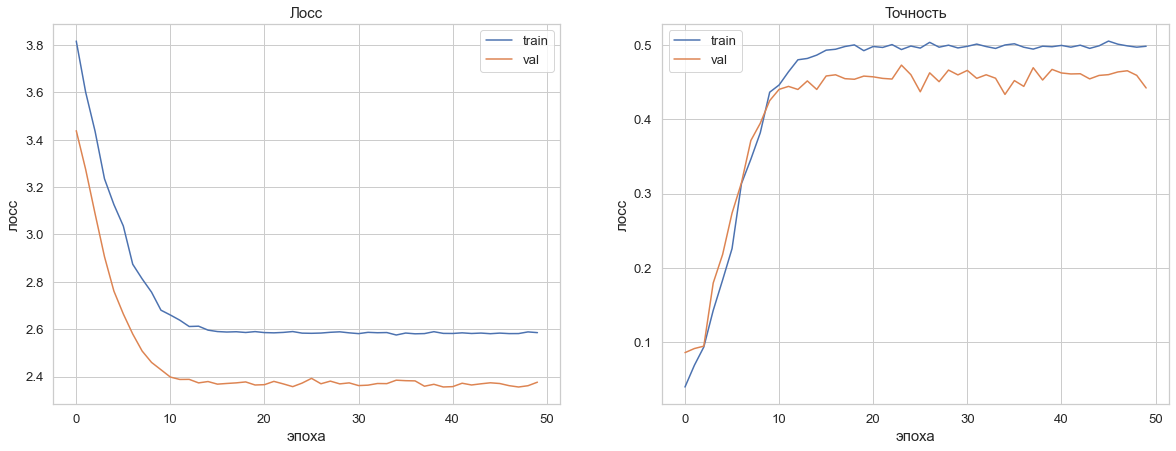

In [60]:
model = SimpleConvNet_2().to(device)
criterion = nn.CrossEntropyLoss()
criterion_2 = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-1)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.3)

n_epoch = 50

model, history = train(model=model, criterion=criterion_2, optimizer=optimizer, scheduler=scheduler,
    train_batch_gen=train_batch_gen, val_batch_gen=val_batch_gen, num_epochs=n_epoch)

Epoch 1 of 50 took 32.922s
  training loss (in-iteration): 	4.006791
  validation loss (in-iteration): 	3.955668
  training f1-score: 			1.43 %
  validation f1-score: 			0.68 %


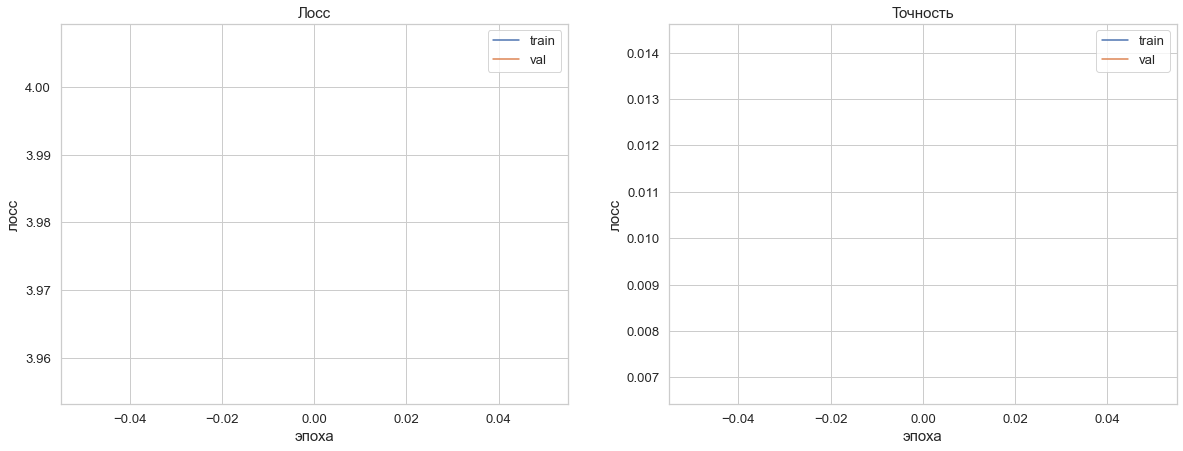

  0%|          | 0/271 [00:00<?, ?it/s]

C:\Users\poloz\AppData\Local\Temp/ipykernel_12464/2579916089.py:48: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.logsoftmax5(self.fc5(layer4))


KeyboardInterrupt: 

In [59]:
model_2 = SimpleConvNet_2().to(device)

criterion = nn.CrossEntropyLoss()
criterion_2 = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-1)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.3)

scheduler_2 = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.7)

n_epoch = 50

model_2, history = train(model=model_2, criterion=criterion_2, optimizer=optimizer, scheduler=scheduler,
    train_batch_gen=train_batch_gen, val_batch_gen=val_batch_gen, num_epochs=n_epoch)

In [15]:
torch.save(model.state_dict(), './model_best.pt')

In [18]:
torch.save(model.state_dict(), './model1.pt')

In [17]:
torch.save(model.state_dict(), './model_2.pt')

Протестируйте своё решение:


In [38]:
# Считываем названия директорий, которые и есть имена авторов
TEST_DIR = os.path.join(DATA_PATH, "test")

ARTIST_LIST = {i:name for i, name in enumerate(os.listdir(TEST_DIR))}
TEST_TRANSFORMED_DIR = os.path.join(DATA_PATH, "test_transformed")

min_img_h = 226
min_img_w = 204

def make_resize(img):
    resizer = torchvision.transforms.Resize(size=(min_img_h, min_img_w))
    return resizer.forward(img).numpy().transpose([1, 2, 0])

os.makedirs(os.path.join(TEST_TRANSFORMED_DIR), exist_ok=True)

# Создаем директорию с валидационной выборкой для каждого художника.
for artist in tqdm(ARTIST_LIST.values()):
    os.makedirs(os.path.join(TEST_TRANSFORMED_DIR, artist), exist_ok=True)

    # Считываем выборку картин художника.
    artist_path = os.path.join(TEST_DIR, artist)
    
    # Сортируем картины для детерминированнсти
    images_filename = sorted(os.listdir(artist_path))
    
    num_images = len(images_filename)
    for image_filename in images_filename:
        path_to_img = os.path.join(artist_path, image_filename)
        img = plt.imread(path_to_img)
        if len(img.shape) < 3:
            continue
        img = make_resize(torch.tensor(img.transpose([2, 0, 1])))
        pil_img = Image.fromarray(img)
        convert_tensor = transforms.ToTensor()
        pil_img.save(os.path.join(TEST_TRANSFORMED_DIR, artist) + f"/{image_filename}")


  0%|          | 0/50 [00:00<?, ?it/s]

In [39]:
test_dataset = datasets.ImageFolder(TEST_TRANSFORMED_DIR, transform=transforms.ToTensor())

In [40]:
# Используйте test_dataset только для финальной оценки качества
test_batch_gen = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [41]:
model_best = SimpleConvNet_2()
model_best.load_state_dict(torch.load('./model_best.pt'))
model_best.eval()

SimpleConvNet_2(
  (conv1_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (leaky_relu1): LeakyReLU(negative_slope=0.01)
  (conv1_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (mp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (in1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (droupout1): Dropout(p=0.3, inplace=False)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2))
  (mp2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (droupout2): Dropout(p=0.3, inplace=False)
  (elu2): ELU(alpha=1.0)
  (mp3): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (flatten3): Flatten(start_dim=1, end_dim=-1)
  (fc3): Linear(in_features=3584, out_features=1024, bias=True)
  (droupout3): Dropout(p=0.3, inplace=False)
  (leaky_relu3): LeakyReLU(

In [36]:
y_val = np.array([])
y_val_pred = np.array([])
        
# Полный проход по тесту   
for X_batch, y_batch in tqdm(val_batch_gen):
            
    # Логиты, полученные моделью
    logits = model_simple(X_batch)

    # Сохраяняем лоссы и точность на валидации
    y_pred = logits.max(1)[1].detach().cpu().numpy()
            
    y_val = np.concatenate((y_val, y_batch.cpu().numpy()))
    y_val_pred = np.concatenate((y_val_pred, y_pred))
            

# Подсчитываем лоссы и сохраням в "историю"
val_f1 = f1_score(y_val, y_val_pred, average='macro')
val_f1

  0%|          | 0/171 [00:00<?, ?it/s]

C:\Users\poloz\AppData\Local\Temp/ipykernel_12464/2579916089.py:48: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.logsoftmax5(self.fc5(layer4))


0.21921944105322244

In [37]:
val_f1 = f1_score(y_val, y_val_pred, average='macro')
val_f1

0.4313959677822838

In [42]:
y_test = np.array([])
y_test_pred = np.array([])
        
# Полный проход по тесту   
for X_batch, y_batch in tqdm(test_batch_gen):
            
    # Логиты, полученные моделью
    logits = model_best(X_batch)

    # Сохраяняем лоссы и точность на валидации
    y_pred = logits.max(1)[1].detach().cpu().numpy()
            
    y_test = np.concatenate((y_test, y_batch.cpu().numpy()))
    y_test_pred = np.concatenate((y_test_pred, y_pred))
            

# Подсчитываем лоссы и сохраням в "историю"
test_f1 = f1_score(y_test, y_test_pred, average='macro')

  0%|          | 0/80 [00:00<?, ?it/s]

C:\Users\poloz\AppData\Local\Temp/ipykernel_12464/2579916089.py:48: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.logsoftmax5(self.fc5(layer4))


In [43]:
test_f1_score = test_f1
test_f1_score

0.21921944105322244

In [26]:
print("Итоговый результат:")
print("Test F1 score:\t\t{:.2f} %".format(test_f1_score * 100))

if test_f1_score * 100 >= 35:
    print("Достижение: 15 баллов из 15!")
elif test_f1_score * 100 >= 32.5:
    print("Достижение: 13 баллов из 15!")
elif test_f1_score * 100 >= 30:
    print("Достижение: 11 баллов из 15!")
elif test_f1_score * 100 >= 27.5:
    print("Достижение: 9 баллов из 15!")
elif test_f1_score * 100 >= 25:
    print("Достижение: 7 баллов из 15!")
elif test_f1_score * 100 >= 20:
    print("Достижение: 5 баллов из 15!")
elif test_f1_score * 100 >= 17:
    print("Достижение: 3 балла из 15!")
else:
    print("Попробуй еще.")

Итоговый результат:
Test F1 score:		21.92 %
Достижение: 5 баллов из 15!


Ссылка на гугл-диск с моделью: https://drive.google.com/file/d/1is4jh3PiIUy8uC_qlScpiKGYFtQl8_Gf/view?usp=sharing

## ___

Обязательно заполните отчет. Опишите свои эксперименты: с чего вы начали, что попробовали улучшить и почему, заработало это или нет, какие вы сделали из этого выводы. Также обязательно опишите вашу лучшую архитектуру, методы обучения и интересные моменты.

Отчет: в модели (`SimpleConvNet_2`) 5 слоев. В первом слое 2 сверточных, 1 пул. После сверточного слоя идет либо активация, либо пул. В конце слоя нормализация (по эвристикам с семинара). В качестве оптимизатора взял Adam с затухающим по экспоненте `lr=1e-4`, с регуляризацией весов. Пытался также: 
* написать `Inception` на первых слоях (модель `SimpleConvNet_res`), но это не улучшило на трейне;
* изменить параметры Dropout, чтоб бороться с переобучением;
* использовать корсс-энтропию вместо логсофтмакса с Nll-критерием;
* в последний момент попробовал стратегию StepLR.

После (модель обучалась недолго, минут 30, но д/з пытался делать несколько дней, потому что ну нет вообще никакой интуиции, что и как работает, если честно)  [минут, часов, дней] обучения, я получил следующие результаты:

* accuracy on training: 98.36
* accuracy on validation: 26.83
* accuracy on test: 26.98

Напоминаем, что вы должны были сохранить **веса вашей модели**. Загрузите их на диск и **скопируйте сюда ссылку**:
https://drive.google.com/file/d/1is4jh3PiIUy8uC_qlScpiKGYFtQl8_Gf/view?usp=sharing

## Часть 2: Критерий остановки для обучения нейросетей

Представьте себе такую ситуацию...

Как всегда у всех горят сроки, заказчик просит скорее получить хорошую модель. Вы обучаете модель и видите по кривой обучения, что некоторый прирост в качестве еще есть. Только обучается она очень долго. Как понять, хватит ли уже проведенных итераций или нужно еще? Давайте проверим, значимо ли отличаются эти изменения.  

Проверьте статистическую значимость улучшения в качестве сети на последней итерации и на одной из предыдущих итераций. На какой именно &mdash; решайте сами. Тогда, если результаты значимо отличаются, то имеет смысл дообучить модель. В качестве модели можете использовать как свою модель из предыдущей части, так и предобученную из следующей части задания. Нужно показать, что вы остановили обучение основываясь на данном критерий.

*Баллы даются за реализацию и за выводы, почему ваш критерий хорошо сработал/не сработал*.

## Часть 3: Transfer Learning

Попробуйте теперь использовать предобученную модель для классификации и сравните результаты.
Сделав эту часть задания и написав выводы в конце, вы сможете получить 5 баллов.


Вы можете пробовать любые предобученные архитектуры. Некоторые из них можно найти по ссылке [torchvision.models](https://pytorch.org/vision/stable/models.html).

Загрузите веса модели:

Все предобученные модели можно разделить на две части:

* Cверточная часть, которая работает как feature extractor.

* Классификатор.

Скорее всего вам потребуется заменить предобученный классификатор, чтобы использовать модель для работы с новым датасетом. Наиболее популярные подходы при замене классификатора:

* Fully-connected слои.

* Global average pooling. Подробнее можно прочитать в [статье](https://arxiv.org/pdf/1312.4400.pdf).

* [Linear SVM](https://arxiv.org/pdf/1306.0239.pdf), если хочется чего-нибудь необычного.

#### Несколько советов:

* Так как входные данные разных моделей могут иметь разный размер, вам может потребоваться поменять исходный размер изображения. В этом могут помочь, например, `cv2.resize`, `skimage.resize` или `torch.transforms.Resize`.

* Для дообучения слоев с предобученными весами можно использовать меньший learning rate, чем для обучения слоев со случайной инициализацией. Так как в самом начале обучения градиенты от случайно инициализированного классификатора могут слишком сильно изменить хорошие предобученные веса.

#### Стратегии:

* Использовать предобученную нейросеть как feature extractor, убрав последний FC слой. Обучить новый классификатор на полученном признаковом описании.

* При обучении классификатора продолжить backpropagation на более глубокие слои нейросети ("разморозить" их). При этом возможно "разморозить" все слои или зафиксировать несколько начальных слоёв и не обучать их.

* Вы можете совместить стратегии: сначала обучить классификатор, а потом постепенно размораживать слои и обучать их с меньшим learning rate-ом.

Какую стратегию вы выбрали и почему?

**Вывод:** ____

Сравните результаты предобученной модели и результаты из первой части. Сделайте вывод.